In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent
# Calculate the date 1 year ago from the last data point in the database
end = pd.Timestamp(list(np.ravel(most_recent))[0]) - pd.offsets.Day(365)
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between
('2016-08-23', 'most_recent')).all()
dlast_year = pd.DataFrame(last_year)
dlast_year


,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


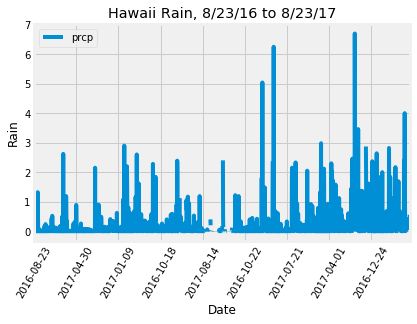

In [54]:
dlast_year.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain")
plt.title("Hawaii Rain, 8/23/16 to 8/23/17")
plt.xticks(rotation=60)
plt.show()


![precipitation](Images/precipitation.png)

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dlast_year.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [60]:
# Design a query to show how many stations are available in this dataset?
stationcount = session.query(Station).count()
print(f"There are {stationsCount} stations")

There are 9 stations


In [71]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationcounts = (session.query(Measurement.station, func.count(Measurement.station))
                        .order_by(func.count(Measurement.station).desc())
                        .group_by(Measurement.station)
                        .all())
print(stationcounts)
print(f'{stationcounts[0][0]} was the most active')

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281 was the most active


In [74]:
maxstation = stationcounts[0][0] 
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highestTemp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == maxstation)
                      .order_by(Measurement.tobs.desc())
                      .first())
highestTemp = highestTemp[0]
print(f"The highest temperature recorded at the most active station was {highestTemp} degrees Farenheit.")

lowestTemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == maxstation)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowestTemp = lowestTemp[0]
print(f"The lowest temperature recorded at the most active station was {lowestTemp} degrees Farenheit.")

avgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == maxstation))
avgTemp = '{0:.3}'.format(avgTemp[0][0])
print(f"The average temperature recorded at the most active station was {avgTemp} degrees Farenheit.")

The highest temperature recorded at the most active station was 85.0 degrees Farenheit.
The lowest temperature recorded at the most active station was 54.0 degrees Farenheit.
The average temperature recorded at the most active station was 71.7 degrees Farenheit.


In [76]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observations = session.query(Measurement.station, Measurement.tobs).filter\
               (Measurement.date.between('2016-08-23', 'recent'))\
               .filter(Measurement.station == maxstation).all()
pd.DataFrame(observations)

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


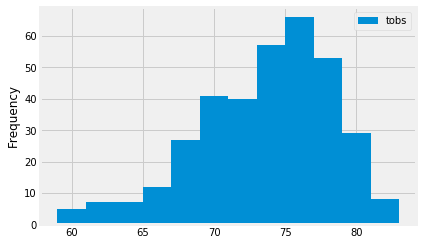

In [77]:
pd.DataFrame(observations).plot(kind='hist', bins=12)

![precipitation](Images/station-histogram.png)